# Edge Classifier Debug

**Goal**: Test the weighting and hard cut config of the data loading process

In [1]:
%load_ext autoreload
%autoreload 2

import os
import yaml

import numpy as np
import pandas as pd
import seaborn as sns
import yaml
import torch
from torch_geometric.data import Data
import matplotlib.pyplot as plt

from time import time as tt

/global/homes/d/danieltm/.conda/envs/gnn4itk/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## GNN Debug

In [2]:
from gnn4itk_cf.stages.edge_classifier.models.interaction_gnn import InteractionGNN

In [3]:
config = yaml.load(open('trackml_gnn_train.yaml'), Loader=yaml.FullLoader)

In [4]:
model = InteractionGNN(config)

Defining figures of merit


/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/stages/edge_classifier/models/interaction_gnn.py:89: UserWarning: Failed to define figures of merit, due to logger unavailable
  warnings.warn("Failed to define figures of merit, due to logger unavailable")


In [5]:
model.setup('fit')

/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONAL feature [particle_id] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONAL feature [nhits] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONAL feature [primary] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONAL feature [pdgId] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONA

In [6]:
sample = model.trainset[0]

In [7]:
sample

Data(track_edges=[2, 96834], particle_id=[96834], pt=[96834], radius=[96834], nhits=[96834], config=[2], event_id='000021000', num_nodes=125576, x_phi=[125576], x_module_index=[125576], x_cell_val=[125576], x_x=[125576], x_lphi=[125576], x_lx=[125576], x_leta=[125576], x_r=[125576], x_lz=[125576], x_gphi=[125576], x_z=[125576], x_ly=[125576], x_hit_id=[125576], x_cell_count=[125576], x_eta=[125576], x_region=[125576], x_y=[125576], x_weight=[125576], x_geta=[125576], edge_index=[2, 3018436], y=[3018436], truth_map=[96834], weights=[3018436])

In [6]:
graph_sizes = [sample.edge_index.shape[1] for sample in model.trainset]

/tmp/ipykernel_154263/3214984691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(graph_sizes)


<AxesSubplot: ylabel='Density'>

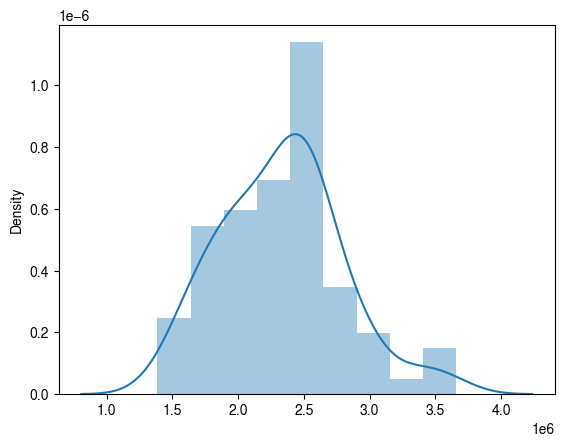

In [7]:
sns.distplot(graph_sizes)

## Metric Debug

In [8]:
%%time
with torch.no_grad():
    out = model.to("cuda")(sample.to("cuda"))

CPU times: user 1.22 s, sys: 614 ms, total: 1.84 s
Wall time: 1.83 s


/global/homes/d/danieltm/.conda/envs/gnn4itk/lib/python3.9/site-packages/torch/utils/checkpoint.py:25: UserWarning: None of the inputs have requires_grad=True. Gradients will be None
  warnings.warn("None of the inputs have requires_grad=True. Gradients will be None")


/tmp/ipykernel_154263/1067247515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(torch.sigmoid(out).cpu())


<AxesSubplot: ylabel='Density'>

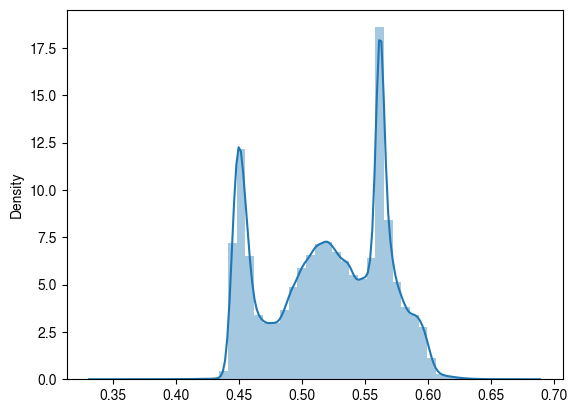

In [ ]:
sns.distplot(torch.sigmoid(out).cpu())

In [9]:
sample

Data(track_edges=[2, 96834], particle_id=[96834], pt=[96834], radius=[96834], nhits=[96834], config=[2], event_id='000021000', num_nodes=125576, x_phi=[125576], x_module_index=[125576], x_cell_val=[125576], x_x=[125576], x_lphi=[125576], x_lx=[125576], x_leta=[125576], x_r=[125576], x_lz=[125576], x_gphi=[125576], x_z=[125576], x_ly=[125576], x_hit_id=[125576], x_cell_count=[125576], x_eta=[125576], x_region=[125576], x_y=[125576], x_weight=[125576], x_geta=[125576], edge_index=[2, 3018436], y=[3018436], truth_map=[96834], weights=[3018436])

In [11]:
sample.weights.shape

torch.Size([3018436])

In [12]:
(sample.weights==0).sum(), (sample.weights==1).sum(), (sample.weights==2).sum()

(tensor(122496, device='cuda:0'),
 tensor(2868422, device='cuda:0'),
 tensor(27518, device='cuda:0'))

In [13]:
sample.y.sum(), (~sample.y).sum()

(tensor(150014, device='cuda:0'), tensor(2868422, device='cuda:0'))

In [14]:
(sample.weights==0 & sample.y).sum()

tensor(122496, device='cuda:0')

In [15]:
(sample.weights==1 & ~sample.y).sum()

tensor(2990918, device='cuda:0')

In [16]:
((sample.weights==2) & sample.y).sum()

tensor(27518, device='cuda:0')

In [17]:
((sample.weights==2) & ~sample.y).sum()

tensor(0, device='cuda:0')

In [18]:
model = model.to("cuda")
sample = sample.to("cuda")

In [19]:
with torch.no_grad():
    outputs = model.shared_evaluation(sample, 0)

In [20]:
outputs

{'loss': tensor(2.0276, device='cuda:0'),
 'all_truth': tensor([False, False, False,  ..., False, False, False], device='cuda:0'),
 'target_truth': tensor([False, False, False,  ..., False, False, False], device='cuda:0'),
 'output': tensor([0.0301, 0.0300, 0.0325,  ..., 0.3246, 0.2998, 0.3335], device='cuda:0')}

In [21]:
outputs["all_truth"].sum()

tensor(150014, device='cuda:0')

In [22]:
outputs["target_truth"].sum()

tensor(27518, device='cuda:0')

In [23]:
sample.y.sum()

tensor(150014, device='cuda:0')

In [39]:
preds = torch.sigmoid(out) > 0.5

In [40]:
# Positives
edge_positive = preds.sum().float()

# Signal true & signal tp
sig_true = outputs["target_truth"].sum().float()
sig_true_positive = (outputs["target_truth"].bool() & preds).sum().float()
background_true_positive = (outputs["all_truth"].bool() & preds).sum().float()

In [41]:
sig_eff = sig_true_positive / sig_true
sig_pur = sig_true_positive / edge_positive
background_pur = background_true_positive / edge_positive

In [42]:
sig_eff, sig_pur, background_pur

(tensor(0.7390, device='cuda:0'),
 tensor(0.0093, device='cuda:0'),
 tensor(0.0544, device='cuda:0'))

## Filter Debug

In [5]:
from gnn4itk_cf.stages.edge_classifier.models.filter import Filter

In [6]:
config = yaml.load(open('filter_train.yaml'), Loader=yaml.FullLoader)

In [10]:
model = Filter(config)

Defining figures of merit


/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/stages/edge_classifier/models/filter.py:44: UserWarning: Failed to define figures of merit, due to logger unavailable
  warnings.warn("Failed to define figures of merit, due to logger unavailable")


In [8]:
model.setup('fit')

/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONAL feature [particle_id] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONAL feature [nhits] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONAL feature [primary] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONAL feature [pdgId] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONA

In [82]:
sample = model.trainset[0]

In [83]:
sample

Data(track_edges=[2, 92848], particle_id=[92848], pt=[92848], radius=[92848], nhits=[92848], config=[2], event_id='000021001', num_nodes=120844, x_y=[120844], x_cell_val=[120844], x_ly=[120844], x_gphi=[120844], x_geta=[120844], x_region=[120844], x_lphi=[120844], x_x=[120844], x_lx=[120844], x_weight=[120844], x_hit_id=[120844], x_leta=[120844], x_r=[120844], x_eta=[120844], x_cell_count=[120844], x_module_index=[120844], x_phi=[120844], x_z=[120844], x_lz=[120844], edge_index=[2, 750575], y=[750575], truth_map=[92848], weights=[750575])

In [10]:
graph_sizes = [sample.edge_index.shape[1] for sample in model.trainset]

/tmp/ipykernel_178689/3214984691.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(graph_sizes)


<AxesSubplot: ylabel='Density'>

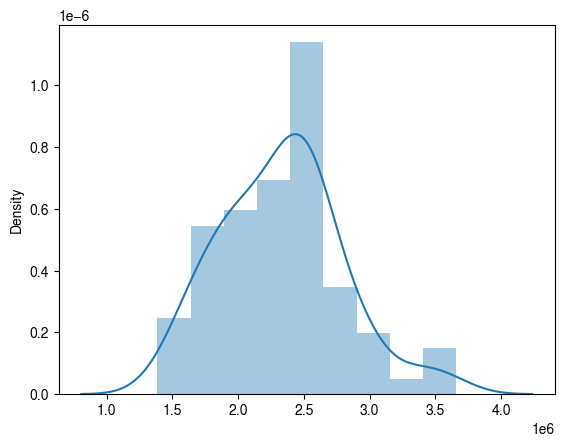

In [11]:
sns.distplot(graph_sizes)

### Memory Debug

In [2]:
edges = torch.randint(0, 100, (2, 1000))
test = Data(edge_index = edges)

In [3]:
# split test into two edge halves
all_edges = test.edge_index
test.edge_index = all_edges[:, :all_edges.shape[1]//2]


In [5]:
test.edge_index = all_edges

In [6]:
test

Data(edge_index=[2, 1000])

### Metric Debug

In [14]:
%%time
with torch.no_grad():
    out = model.to("cuda")(sample.to("cuda"))

CPU times: user 1.09 s, sys: 556 ms, total: 1.64 s
Wall time: 8.48 s


/tmp/ipykernel_63776/1067247515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(torch.sigmoid(out).cpu())


<AxesSubplot: ylabel='Density'>

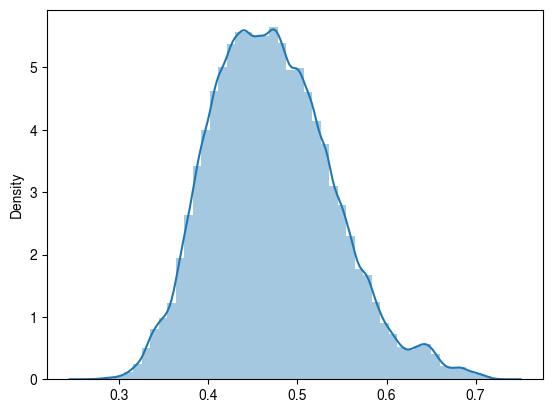

In [15]:
sns.distplot(torch.sigmoid(out).cpu())

In [16]:
sample

Data(track_edges=[2, 92848], particle_id=[92848], pt=[92848], radius=[92848], nhits=[92848], config=[2], event_id='000021001', num_nodes=120844, x_y=[120844], x_cell_val=[120844], x_ly=[120844], x_gphi=[120844], x_geta=[120844], x_region=[120844], x_lphi=[120844], x_x=[120844], x_lx=[120844], x_weight=[120844], x_hit_id=[120844], x_leta=[120844], x_r=[120844], x_eta=[120844], x_cell_count=[120844], x_module_index=[120844], x_phi=[120844], x_z=[120844], x_lz=[120844], edge_index=[2, 750575], y=[750575], truth_map=[92848], weights=[750575])

In [17]:
sample.weights.shape

torch.Size([750575])

In [18]:
(sample.weights==-1).sum(), (sample.weights==0).sum(), (sample.weights==1).sum(), (sample.weights==2).sum()

(tensor(0, device='cuda:0'),
 tensor(54705, device='cuda:0'),
 tensor(695870, device='cuda:0'),
 tensor(0, device='cuda:0'))

In [19]:
sample.y.sum(), (~sample.y).sum()

(tensor(67698, device='cuda:0'), tensor(682877, device='cuda:0'))

In [21]:
((sample.weights==1) & sample.y).sum()

tensor(12993, device='cuda:0')

In [22]:
((sample.weights==1) & ~sample.y).sum()

tensor(682877, device='cuda:0')

In [23]:
((sample.weights==0) & sample.y).sum()

tensor(54705, device='cuda:0')

In [24]:
((sample.weights==0) & ~sample.y).sum()

tensor(0, device='cuda:0')

In [25]:
model = model.to("cuda")
sample = sample.to("cuda")

In [26]:
with torch.no_grad():
    outputs = model.shared_evaluation(sample, 0)

In [27]:
outputs

{'loss': tensor(1.4251, device='cuda:0'),
 'all_truth': tensor([False, False, False,  ..., False, False, False], device='cuda:0'),
 'target_truth': tensor([False, False, False,  ..., False, False, False], device='cuda:0'),
 'output': tensor([-0.1153, -0.2671, -0.2979,  ...,  0.1024, -0.0105,  0.3147],
        device='cuda:0')}

In [31]:
out = outputs["output"]

In [28]:
outputs["all_truth"].sum()

tensor(67698, device='cuda:0')

In [29]:
outputs["target_truth"].sum()

tensor(12993, device='cuda:0')

In [30]:
sample.y.sum()

tensor(67698, device='cuda:0')

In [45]:
preds = torch.sigmoid(out) > 0.4

In [46]:
# Positives
edge_positive = preds.sum().float()

# Signal true & signal tp
sig_true = outputs["target_truth"].sum().float()
sig_true_positive = (outputs["target_truth"].bool() & preds).sum().float()
background_true_positive = (outputs["all_truth"].bool() & preds).sum().float()

In [47]:
sig_eff = sig_true_positive / sig_true
sig_pur = sig_true_positive / edge_positive
background_pur = background_true_positive / edge_positive

In [48]:
sig_eff, sig_pur, background_pur

(tensor(0.8337, device='cuda:0'),
 tensor(0.0169, device='cuda:0'),
 tensor(0.0916, device='cuda:0'))

### Normalize inputs

In [21]:
# Get max, mean and min of each node feature
node_features = model.hparams["node_features"]

In [22]:
node_features

['x_r',
 'x_phi',
 'x_z',
 'x_cell_count',
 'x_cell_val',
 'x_leta',
 'x_lphi',
 'x_lx',
 'x_ly',
 'x_lz',
 'x_geta',
 'x_gphi']

In [23]:
statistics = {}
for data in model.trainset:
    for feature in node_features:
        if feature not in statistics:
            statistics[feature] = {"max": [], "mean": [], "min": [], "std": []}
        statistics[feature]["max"].append(data[feature].max())
        statistics[feature]["mean"].append(data[feature].mean())
        statistics[feature]["min"].append(data[feature].min())
        statistics[feature]["std"].append(data[feature].std())

# Get max, mean and min of each statistic feature
for feature in statistics:
    statistics[feature]["max"] = np.max(statistics[feature]["max"])
    statistics[feature]["mean"] = np.mean(statistics[feature]["mean"])
    statistics[feature]["min"] = np.min(statistics[feature]["min"])
    statistics[feature]["std"] = np.mean(statistics[feature]["std"])

In [24]:
for feature in statistics:
    print(f"{feature} max: {statistics[feature]['max']:.2f}")
    print(f"{feature} mean: {statistics[feature]['mean']:.2f}")
    print(f"{feature} min: {statistics[feature]['min']:.2f}")
    print(f"{feature} std: {statistics[feature]['std']:.2f}")
    print("---")

x_r max: 1.03
x_r mean: 0.32
x_r min: 0.03
x_r std: 0.30
---
x_phi max: 1.00
x_phi mean: -0.00
x_phi min: -1.00
x_phi std: 0.58
---
x_z max: 2.96
x_z mean: 0.00
x_z min: -2.96
x_z std: 1.06
---
x_cell_count max: 345.00
x_cell_count mean: 3.43
x_cell_count min: 1.00
x_cell_count std: 3.75
---
x_cell_val max: 345.00
x_cell_val mean: 1.35
x_cell_val min: 0.00
x_cell_val std: 1.58
---
x_leta max: 2.09
x_leta mean: 0.87
x_leta min: 0.01
x_leta std: 0.71
---
x_lphi max: 1.57
x_lphi mean: 1.26
x_lphi min: 0.04
x_lphi std: 0.28
---
x_lx max: 240.00
x_lx mean: 1.41
x_lx min: 0.50
x_lx std: 1.44
---
x_ly max: 55.20
x_ly mean: 2.10
x_ly min: 0.06
x_ly std: 3.63
---
x_lz max: 7.00
x_lz mean: 4.23
x_lz min: 3.00
x_lz std: 1.42
---
x_geta max: 4.11
x_geta mean: 0.88
x_geta min: -2.09
x_geta std: 1.44
---
x_gphi max: 1.00
x_gphi mean: -0.00
x_gphi min: -1.00
x_gphi std: 0.58
---


### Inspect true edges

In [25]:
sample = model.trainset[0]

In [26]:
sample

Data(track_edges=[2, 96834], particle_id=[96834], pt=[96834], radius=[96834], nhits=[96834], config=[2], event_id='000021000', num_nodes=125576, x_phi=[125576], x_module_index=[125576], x_cell_val=[125576], x_x=[125576], x_lphi=[125576], x_lx=[125576], x_leta=[125576], x_r=[125576], x_lz=[125576], x_gphi=[125576], x_z=[125576], x_ly=[125576], x_hit_id=[125576], x_cell_count=[125576], x_eta=[125576], x_region=[125576], x_y=[125576], x_weight=[125576], x_geta=[125576], edge_index=[2, 3018436], y=[3018436], truth_map=[96834], weights=[3018436])

In [29]:
# Plot true edges in sample for one particle
unique_pids, counts_pids = sample.particle_id.unique(return_counts = True)

In [30]:
sample_pid = unique_pids[counts_pids >= 10][0]

In [31]:
sample.particle_id == sample_pid

tensor([False, False, False,  ..., False, False, False])

In [33]:
sample_true_edges = sample.track_edges[:, sample.particle_id == sample_pid]

In [34]:
x, y = sample.x_r*1000 * np.cos(sample.x_phi*3.14), sample.x_r*1000 * np.sin(sample.x_phi*3.14)

In [40]:
sample_true_edges

tensor([[ 22384,  32033,  39181,  46139,  46147,  79677,  87081,  93927, 100370,
         116879],
        [ 32033,  39181,  46139,  46147,  79677,  87081,  93927, 100370, 116879,
         122512]])

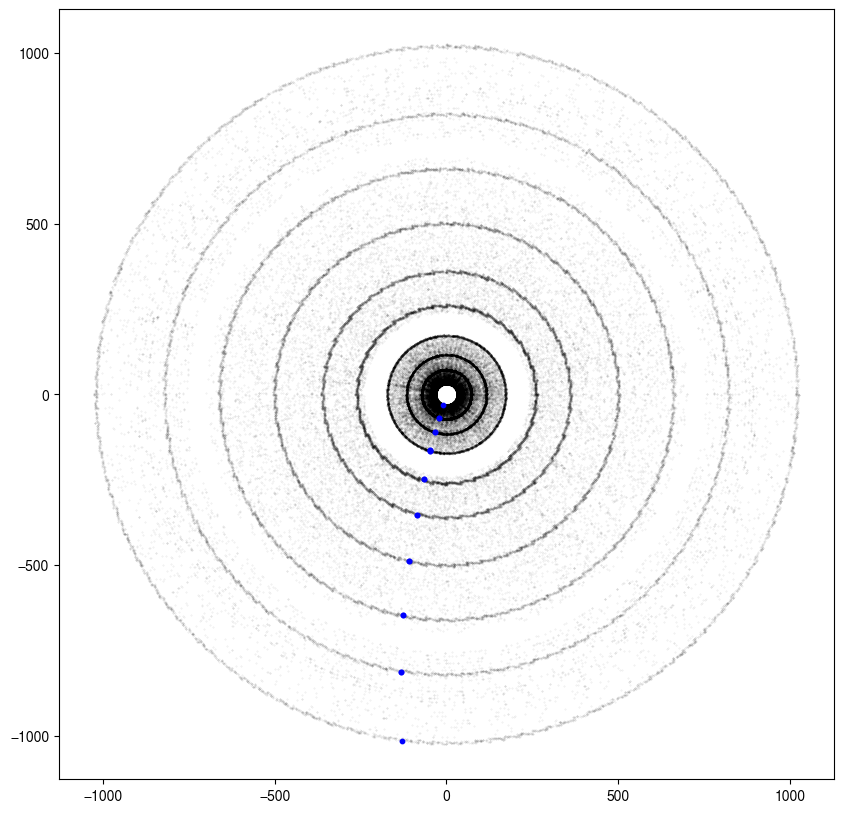

In [43]:
plt.figure(figsize=(10,10))
plt.scatter(x, y, s=0.1, c="black", alpha=0.1)
plt.scatter(x[sample_true_edges[0]], y[sample_true_edges[0]], s=10, c="b")
plt.scatter(x[sample_true_edges[1]], y[sample_true_edges[1]], s=10, c="b")

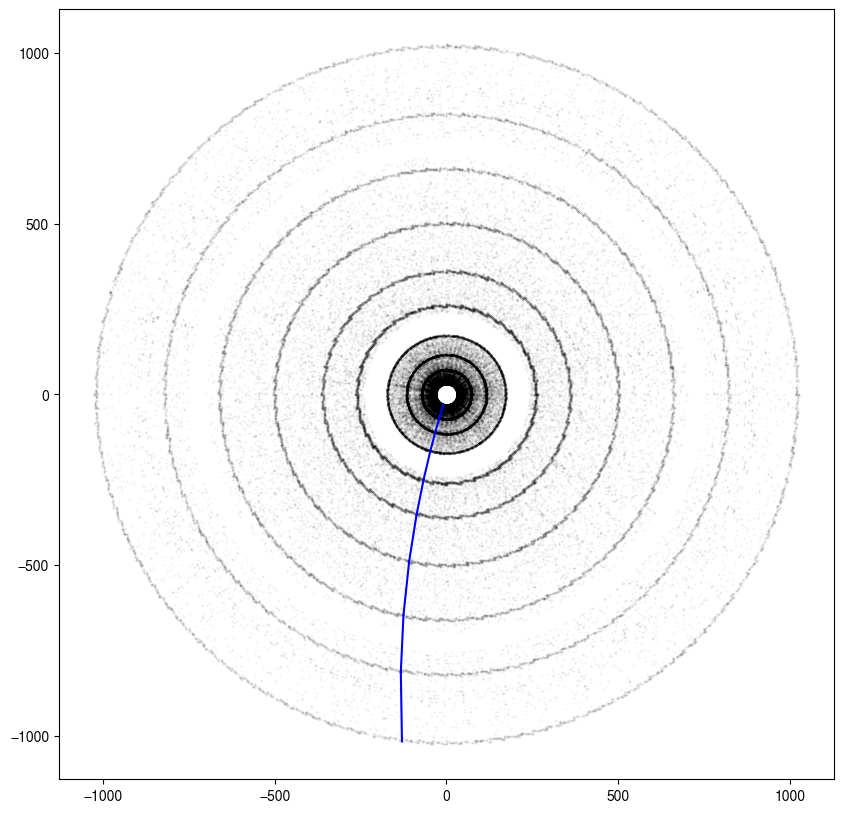

In [45]:
plt.figure(figsize=(10,10))
plt.scatter(x, y, s=0.1, c="black", alpha=0.1)
plt.plot(x[sample_true_edges], y[sample_true_edges], c="b");

In [49]:
sample

Data(track_edges=[2, 96834], particle_id=[96834], pt=[96834], radius=[96834], nhits=[96834], config=[2], event_id='000021000', num_nodes=125576, x_phi=[125576], x_module_index=[125576], x_cell_val=[125576], x_x=[125576], x_lphi=[125576], x_lx=[125576], x_leta=[125576], x_r=[125576], x_lz=[125576], x_gphi=[125576], x_z=[125576], x_ly=[125576], x_hit_id=[125576], x_cell_count=[125576], x_eta=[125576], x_region=[125576], x_y=[125576], x_weight=[125576], x_geta=[125576], edge_index=[2, 3018436], y=[3018436], truth_map=[96834], weights=[3018436])

### Debug Reversed Edges

In [8]:
sample

Data(track_edges=[2, 92848], particle_id=[92848], pt=[92848], radius=[92848], nhits=[92848], config=[2], event_id='000021001', num_nodes=120844, x_y=[120844], x_cell_val=[120844], x_ly=[120844], x_gphi=[120844], x_geta=[120844], x_region=[120844], x_lphi=[120844], x_x=[120844], x_lx=[120844], x_weight=[120844], x_hit_id=[120844], x_leta=[120844], x_r=[120844], x_eta=[120844], x_cell_count=[120844], x_module_index=[120844], x_phi=[120844], x_z=[120844], x_lz=[120844], edge_index=[2, 1501150], y=[1501150], truth_map=[92848], weights=[1501150])

In [54]:
%%time
with torch.no_grad():
    out = model.to("cuda")(sample.to("cuda"))

CPU times: user 8.52 ms, sys: 8.05 ms, total: 16.6 ms
Wall time: 15.9 ms


/tmp/ipykernel_63776/1067247515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(torch.sigmoid(out).cpu())


<AxesSubplot: ylabel='Density'>

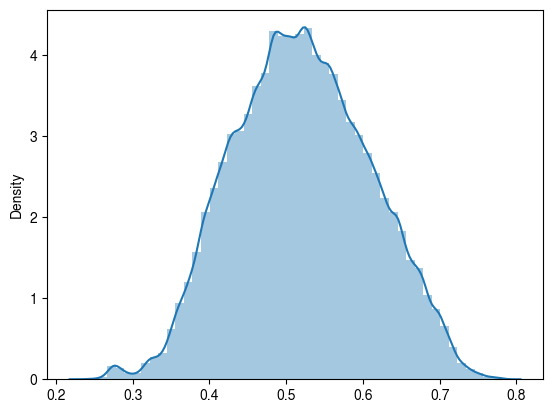

In [55]:
sns.distplot(torch.sigmoid(out).cpu())

In [56]:
sample

Data(track_edges=[2, 92848], particle_id=[92848], pt=[92848], radius=[92848], nhits=[92848], config=[2], event_id='000021001', num_nodes=120844, x_y=[120844], x_cell_val=[120844], x_ly=[120844], x_gphi=[120844], x_geta=[120844], x_region=[120844], x_lphi=[120844], x_x=[120844], x_lx=[120844], x_weight=[120844], x_hit_id=[120844], x_leta=[120844], x_r=[120844], x_eta=[120844], x_cell_count=[120844], x_module_index=[120844], x_phi=[120844], x_z=[120844], x_lz=[120844], edge_index=[2, 1501150], y=[1501150], truth_map=[92848], weights=[1501150])

In [57]:
sample.weights.shape

torch.Size([1501150])

In [58]:
(sample.weights==-1).sum(), (sample.weights==0).sum(), (sample.weights==1).sum(), (sample.weights==2).sum()

(tensor(0, device='cuda:0'),
 tensor(109410, device='cuda:0'),
 tensor(1391740, device='cuda:0'),
 tensor(0, device='cuda:0'))

In [59]:
sample.y.sum(), (~sample.y).sum()

(tensor(135396, device='cuda:0'), tensor(1365754, device='cuda:0'))

In [60]:
((sample.weights==1) & sample.y).sum()

tensor(25986, device='cuda:0')

In [61]:
((sample.weights==1) & ~sample.y).sum()

tensor(1365754, device='cuda:0')

In [62]:
((sample.weights==0) & sample.y).sum()

tensor(109410, device='cuda:0')

In [63]:
((sample.weights==0) & ~sample.y).sum()

tensor(0, device='cuda:0')

In [64]:
model = model.to("cuda")
sample = sample.to("cuda")

In [65]:
with torch.no_grad():
    outputs = model.shared_evaluation(sample, 0)

In [66]:
outputs

{'loss': tensor(1.4196, device='cuda:0'),
 'all_truth': tensor([False, False, False,  ..., False, False, False], device='cuda:0'),
 'target_truth': tensor([False, False, False,  ..., False, False, False], device='cuda:0'),
 'output': tensor([0.3658, 0.3980, 0.4154,  ..., 0.9324, 0.4613, 0.9142], device='cuda:0')}

In [67]:
out = outputs["output"]

In [68]:
outputs["all_truth"].sum()

tensor(135396, device='cuda:0')

In [69]:
outputs["target_truth"].sum()

tensor(25986, device='cuda:0')

In [70]:
sample.y.sum()

tensor(135396, device='cuda:0')

In [75]:
preds = torch.sigmoid(out) > 0.2

In [76]:
# Positives
edge_positive = preds.sum().float()

# Signal true & signal tp
sig_true = outputs["target_truth"].sum().float()
sig_true_positive = (outputs["target_truth"].bool() & preds).sum().float()
background_true_positive = (outputs["all_truth"].bool() & preds).sum().float()

In [77]:
sig_eff = sig_true_positive / sig_true
sig_pur = sig_true_positive / edge_positive
background_pur = background_true_positive / edge_positive

In [78]:
sig_eff, sig_pur, background_pur

(tensor(1., device='cuda:0'),
 tensor(0.0173, device='cuda:0'),
 tensor(0.0902, device='cuda:0'))

Debug the reversing process

In [84]:
sample

Data(track_edges=[2, 92848], particle_id=[92848], pt=[92848], radius=[92848], nhits=[92848], config=[2], event_id='000021001', num_nodes=120844, x_y=[120844], x_cell_val=[120844], x_ly=[120844], x_gphi=[120844], x_geta=[120844], x_region=[120844], x_lphi=[120844], x_x=[120844], x_lx=[120844], x_weight=[120844], x_hit_id=[120844], x_leta=[120844], x_r=[120844], x_eta=[120844], x_cell_count=[120844], x_module_index=[120844], x_phi=[120844], x_z=[120844], x_lz=[120844], edge_index=[2, 750575], y=[750575], truth_map=[92848], weights=[750575])

In [104]:
edge_index = torch.cat([sample.edge_index, sample.edge_index.flip(0)], dim=1)
y = torch.cat([sample.y, sample.y], dim=0)
weights = torch.cat([sample.weights, sample.weights], dim=0)

In [105]:
edge_index

tensor([[     0,   1471,      0,  ..., 120840, 120840, 120843],
        [    11,      0,   1474,  ..., 120842, 120843, 120842]])

In [106]:
y

tensor([False, False, False,  ..., False, False, False])

In [107]:
weights

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [109]:
# Edges and y are the same shape, I want to get unique edges and map the uniqueness to the y and weights
unique_edges, unique_edge_indices = torch.unique(edge_index, dim=1, return_inverse=True)
unique_y = torch.zeros_like(unique_edges[0], dtype=y.dtype).scatter(0, unique_edge_indices, y)
unique_weights = torch.zeros_like(unique_edges[0], dtype=weights.dtype).scatter(0, unique_edge_indices, weights)

In [110]:
unique_weights

tensor([1., 1., 1.,  ..., 1., 1., 1.])

In [111]:
unique_edges

tensor([[     0,      0,      0,  ..., 120843, 120843, 120843],
        [    11,   1471,   1474,  ..., 120827, 120840, 120842]])

In [112]:
unique_y

tensor([False, False, False,  ..., False, False, False])

In [115]:
edge_index[:, y]

tensor([[  1482,     46,     49,  ..., 120831, 120843, 120827],
        [     0,      2,      3,  ..., 120821, 120826, 120840]])

In [116]:
weights[y]

tensor([0., 0., 0.,  ..., 1., 0., 1.])

In [118]:
unique_edges[:, unique_y]

tensor([[     0,      2,      3,  ..., 120842, 120843, 120843],
        [  1482,     46,     49,  ..., 120364, 120363, 120826]])

In [119]:
unique_weights[unique_y]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

## Test Figure of Merit Setup

In [11]:
import pytorch_lightning as pl
trainer = pl.Trainer(gpus=1, max_epochs=1)

/global/homes/d/danieltm/.conda/envs/gnn4itk/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/accelerator_connector.py:447: LightningDeprecationWarning: Setting `Trainer(gpus=1)` is deprecated in v1.7 and will be removed in v2.0. Please use `Trainer(accelerator='gpu', devices=1)` instead.
  rank_zero_deprecation(
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


In [12]:
# Train filter model
trainer.fit(model)

/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONAL feature [particle_id] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONAL feature [nhits] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONAL feature [primary] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONAL feature [pdgId] not found in data
  warnings.warn(f"OPTIONAL feature [{feature}] not found in data")
/global/u2/d/danieltm/ExaTrkX/GNN4ITkTeam/commonframework/gnn4itk_cf/utils/loading_utils.py:47: UserWarning: OPTIONA

Sanity Checking DataLoader 0:   0%|          | 0/2 [00:00<?, ?it/s]

/global/homes/d/danieltm/.conda/envs/gnn4itk/lib/python3.9/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:236: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 128 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


/global/homes/d/danieltm/.conda/envs/gnn4itk/lib/python3.9/site-packages/pytorch_lightning/trainer/trainer.py:1892: PossibleUserWarning: The number of training batches (20) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Epoch 0:   5%|▌         | 2/40 [00:01<00:19,  1.93it/s, loss=1.47, v_num=4644301]

/global/homes/d/danieltm/.conda/envs/gnn4itk/lib/python3.9/site-packages/pytorch_lightning/utilities/data.py:98: UserWarning: Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 2. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.
  warning_cache.warn(


Epoch 0: 100%|██████████| 40/40 [00:09<00:00,  4.05it/s, loss=1.31, v_num=4644301]

`Trainer.fit` stopped: `max_epochs=1` reached.


Epoch 0: 100%|██████████| 40/40 [00:10<00:00,  4.00it/s, loss=1.31, v_num=4644301]


In [13]:
model.logger